In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile
from qiskit_ibm_provider import IBMProvider
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
provider = IBMProvider()

In [3]:
def generate_function(truth_table, filename=None):
    from boolfunction import BoolFunction
    bool_func = BoolFunction.from_truth_table(truth_table)

    return bool_func.quantum_oracle(filename)

In [4]:
def form_dj_circuit(oracle, n):
    # Create registers to work with
    input_register = QuantumRegister(n, 'in')
    output_register = QuantumRegister(1, 'out')
    result_register = ClassicalRegister(n, 'res')

    # Out of registers prepare a circuit
    result_circuit = QuantumCircuit()
    result_circuit.add_register(input_register)
    result_circuit.add_register(output_register)
    result_circuit.add_register(result_register)

    # Prepare state
    result_circuit.x(n)
    result_circuit.h(range(n + 1))
    result_circuit.barrier()

    # Call oracle
    result_circuit.append(oracle, range(n + 1))
    result_circuit.barrier()

    # Get result
    result_circuit.h(range(n))
    result_circuit.measure(range(n), range(n))

    return result_circuit

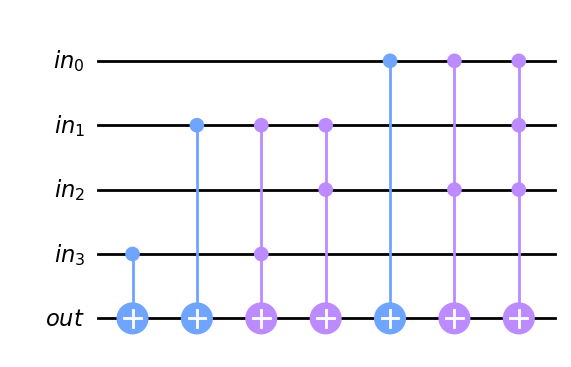

In [5]:
gate, circuit_image = generate_function('0101110010010011', filename='oracle.pdf')
circuit_image

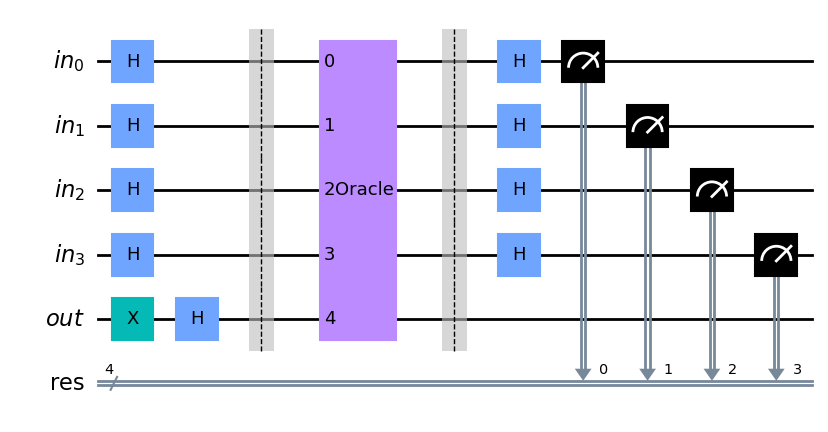

In [6]:
dj_circuit = form_dj_circuit(gate, 4)
dj_circuit.draw('mpl')

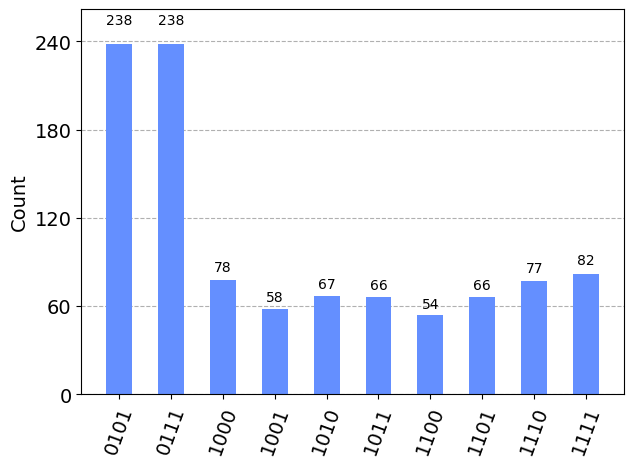

In [7]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(dj_circuit, simulator)

counts = simulator.run(circ).result().get_counts()
plot_histogram(counts)

In [ ]:
backend = provider.get_backend('ibmq_jakarta')
transpiled_bv_circuit = transpile(dj_circuit, backend)

job = backend.run(transpiled_bv_circuit, shots=1024)
print(job.job_id())
job_monitor(job, interval=2)

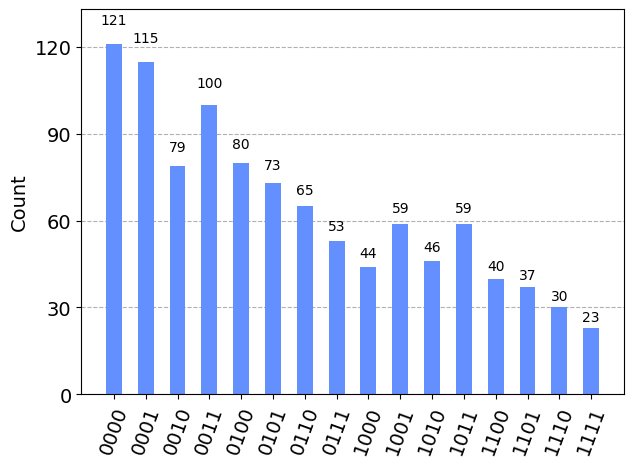

In [8]:
job = provider.retrieve_job('ch4hl0h7o5gvn6p9am90')
counts = job.result().get_counts()
plot_histogram(counts)